# Chapter 11: Visualization with Matplotlib, Pandas, and Seaborn

## Recipes

* [Getting started with matplotlib](#Getting-started-with-matplotlib)
* [Visualizing data with matplotlib](#Visualizing-data-with-matplotlib)
* [Plotting basics with pandas](#Plotting-basics-with-pandas)
* [Visualizing the flights dataset](#Visualizing-the-flights-dataset)
* [Stacking area charts to discover emerging trends](#Stacking-area-charts-to-discover-emerging-trends)
* [Understanding the differences between seaborn and pandas](#Understanding-the-differences-between-seaborn-and-pandas)
* [Doing multivariate analysis with seaborn grids](#Doing-multivariate-analysis-with-seaborn-grids)
* [Uncovering Simpson's paradox in the diamonds dataset with seaborn](#Uncovering-Simpson's-paradox-in-the-diamonds-dataset-with-seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting started with Matplotlib

## Getting Ready

Text(0.5, 1.03, 'Figure Title')

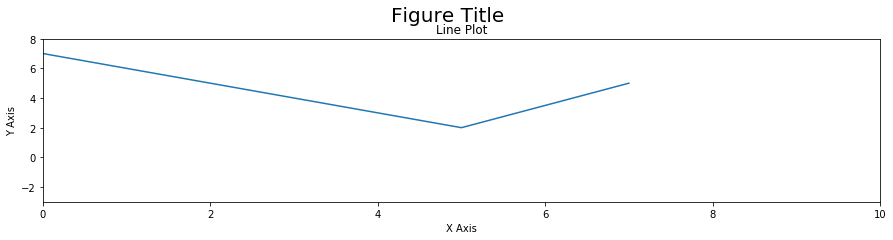

In [4]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

Text(0.5, 1.03, 'Figure Title')

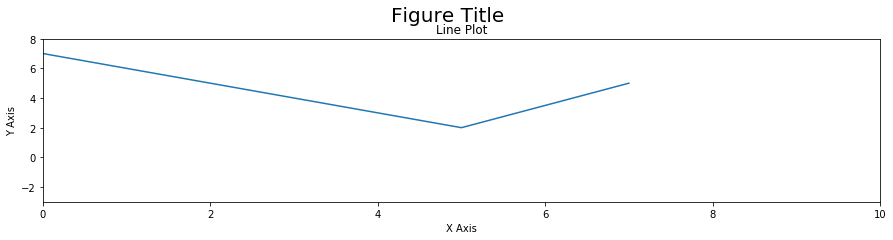

In [5]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

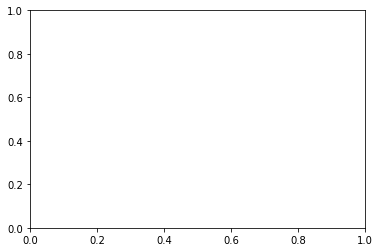

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

In [7]:
type(fig)

matplotlib.figure.Figure

In [8]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [9]:
fig.get_size_inches()

array([6., 4.])

In [10]:
fig.set_size_inches(14, 4)

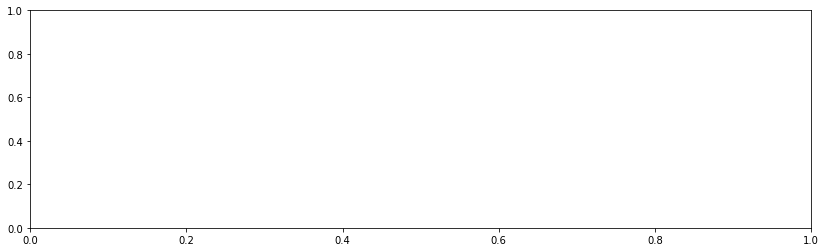

In [11]:
fig

In [12]:
fig.axes

In [13]:
fig.axes[0] is ax

True

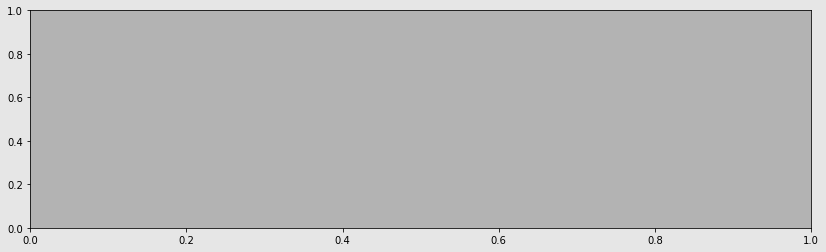

In [14]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [15]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x715092a58>),
             ('right', <matplotlib.spines.Spine at 0x715092e48>),
             ('bottom', <matplotlib.spines.Spine at 0x715092208>),
             ('top', <matplotlib.spines.Spine at 0x7150a47f0>)])

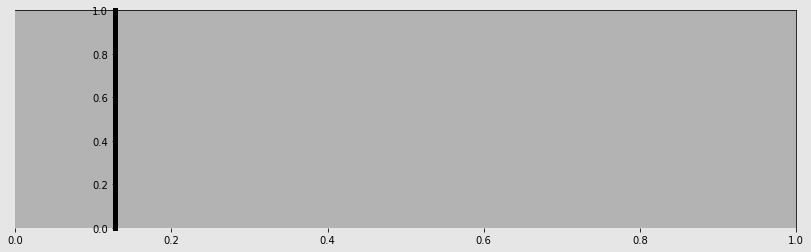

In [16]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

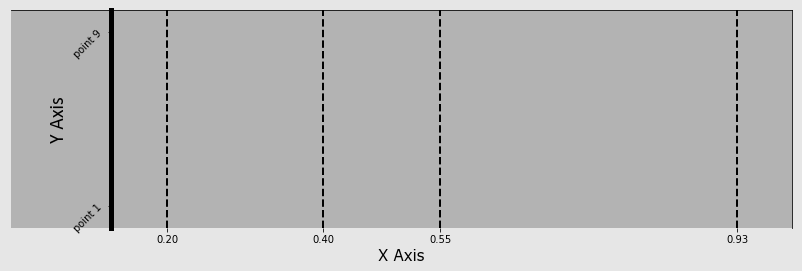

In [18]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig


In [19]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 22.200000000000003, 'X Axis'),
  Text(1, 23.200000000000003, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x7150b7630>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 1008x288 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'in_layout': True,
 'label': Text(0.5, 22.200000000000003, 'X Axis'),
 'label_position': 'bottom',
 'label_text': 'X Axis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x7150a45f8>,
 'major_locator': <matplotlib.ticker.FixedLocator at 0x715845f28>,
 'major_ticks': [<matplotlib.axis.XTick at 0x7150ba0b8>,
 'majorticklabels': <a list of 4 Text major ticklabel objects>,
 'majorticklines': <a list of 8 Line2D ticklines objects>,
 'majorticklocs': array([0.2 , 0.4 , 0.55, 0.93]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at 0x7150a44a8>,
 'minor_l

In [20]:
movie = pd.read_csv('data/movie.csv')

In [21]:
med_budget = movie.groupby('title_year')['budget'].median()/1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64